# Implementing a one-layer Neural Network


We will illustrate how to create a one hidden layer NN

We will use the iris data for this exercise

We will build a one-hidden layer neural network  to predict the fourth attribute, Petal Width from the other three (Sepal length, Sepal width, Petal length).

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops

In [0]:
ops.reset_default_graph()

In [0]:
iris = datasets.load_iris()
x_vals = np.array([x[0:3] for x in iris.data])
y_vals = np.array([x[3] for x in iris.data])

In [0]:
# Create graph session 
sess = tf.Session()

In [0]:
# make results reproducible
seed = 2
tf.set_random_seed(seed)
np.random.seed(seed)  

In [0]:
# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]

y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [0]:
# Normalize by column (min-max norm)
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m-col_min) / (col_max - col_min)
    
    
x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [0]:
# Declare batch size
batch_size = 50

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

In [9]:
# Create variables for both NN layers
hidden_layer_nodes = 10
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1]))   # 1 bias for the output


# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
final_output = tf.nn.relu(tf.add(tf.matmul(hidden_output, A2), b2))

# Declare loss function (MSE)
loss = tf.reduce_mean(tf.square(y_target - final_output))

# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec = []
test_loss = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})

    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(np.sqrt(temp_loss))
    
    test_temp_loss = sess.run(loss, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_loss.append(np.sqrt(test_temp_loss))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss))

Generation: 50. Loss = 0.52790153
Generation: 100. Loss = 0.22871475
Generation: 150. Loss = 0.17977345
Generation: 200. Loss = 0.10849867
Generation: 250. Loss = 0.24002914
Generation: 300. Loss = 0.15323997
Generation: 350. Loss = 0.1659011
Generation: 400. Loss = 0.09752481
Generation: 450. Loss = 0.12161428
Generation: 500. Loss = 0.1300937


# Applying dropout 



*  ###  Dropout is a *regularization technique* patented by Google for reducing overfitting in neural networks by preventing complex co-adaptations on training data. 
*  ### It is a very efficient way of *performing model averaging with neural networks*. 
*  ### The term "dropout" refers to dropping out units (both hidden and visible) in a neural network.

In [0]:
# Reinitialize graph
ops.reset_default_graph()

# Create graph
sess = tf.Session()

In [0]:
# Initialize placeholders
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
dropout_rate = tf.placeholder(dtype=tf.float32)  # The probability that each element of x is discarded (=1-keep_prob)

In [0]:
# Create variables for both NN layers
A1 = tf.Variable(tf.random_normal(shape=[3,hidden_layer_nodes])) # inputs -> hidden nodes
b1 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes]))   # one biases for each hidden node
A2 = tf.Variable(tf.random_normal(shape=[hidden_layer_nodes,1])) # hidden inputs -> 1 output
b2 = tf.Variable(tf.random_normal(shape=[1]))   # 1 bias for the output

In [0]:
# Declare model operations
hidden_output = tf.nn.relu(tf.add(tf.matmul(x_data, A1), b1))
dropout_output = tf.nn.dropout(hidden_output, rate=dropout_rate)
final_output = tf.nn.relu(tf.add(tf.matmul(dropout_output, A2), b2))

# Declare loss function (MSE)
loss_dropout = tf.reduce_mean(tf.square(y_target - final_output))

# Declare optimizer
my_opt_dropout = tf.train.GradientDescentOptimizer(0.005)
train_step = my_opt.minimize(loss_dropout)

In [15]:
# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

# Training loop
loss_vec_dropout = []
test_loss_dropout = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y, dropout_rate: 0.1})

    temp_loss_dropout = sess.run(loss_dropout, feed_dict={x_data: rand_x, y_target: rand_y, dropout_rate: 0.1})
    loss_vec_dropout.append(np.sqrt(temp_loss_dropout))
    
    test_temp_loss_dropout = sess.run(loss_dropout, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test]), dropout_rate: 0.1})
    test_loss_dropout.append(np.sqrt(test_temp_loss_dropout))
    if (i+1)%50==0:
        print('Generation: ' + str(i+1) + '. Loss = ' + str(temp_loss_dropout))

Generation: 50. Loss = 0.20280993
Generation: 100. Loss = 0.1691381
Generation: 150. Loss = 0.1214592
Generation: 200. Loss = 0.20520864
Generation: 250. Loss = 0.15801296
Generation: 300. Loss = 0.15454443
Generation: 350. Loss = 0.0716876
Generation: 400. Loss = 0.068433546
Generation: 450. Loss = 0.07875443
Generation: 500. Loss = 0.07450813


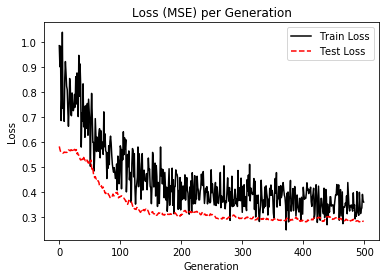

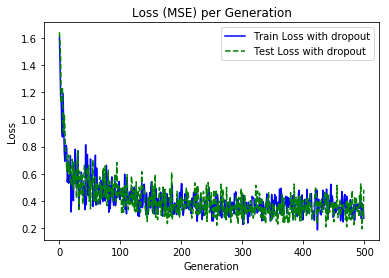

In [16]:
%matplotlib inline
# Plot loss (MSE) over time
plt.plot(loss_vec, 'k-', label='Train Loss')
plt.plot(test_loss, 'r--', label='Test Loss')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()


plt.plot(loss_vec_dropout, 'b-', label='Train Loss with dropout')
plt.plot(test_loss_dropout, 'g--', label='Test Loss with dropout')
plt.title('Loss (MSE) per Generation')
plt.legend(loc='upper right')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()